In [1]:
%pip install -r requirements.txt
from IPython.display import clear_output
clear_output()

In [9]:
import pandas as pd
import numpy as np
import datetime

def clean_data():
    data = pd.read_excel('data/base.xlsx')
# Change column names to lowercase and replace spaces with underscores and remove accents
    data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace('á', 'a').str.replace('é', 'e').str.replace('í', 'i').str.replace('ó', 'o').str.replace('ú', 'u')
# Convert 'Dia' column to string type
    data['dia'] = data['dia'].astype(str)
# Sacar el día de la semana de día, que es la mitad izquierda antes del espacio
    data['dia_semana'] = data['dia'].apply(lambda x: x.split(' ')[0])
    data['dia_mes'] = data['dia'].apply(lambda x: x.split(' ')[1])
# make 'num_Espera' column with the amount of 'Espera' turned into seconds
    data['num_espera'] = data['espera'].apply(lambda x: x.hour * 60*60 + x.minute*60 + x.second)
# make 'num_duracion' column with the amount of 'duracion' turned into seconds
    data['num_duracion'] = data['duracion'].apply(lambda x: x.hour * 60*60 + x.minute*60 + x.second)
# make 'num_entre_llegadas' column with the amount of 'entre_llegadas' turned into seconds
    data['num_entre_llegadas'] = data['entre_llegadas'].apply(lambda x: x.hour * 60*60 + x.minute*60 + x.second)
# make 'num_llegada' column with the amount of 'llegada' turned into seconds
    data['llegada'] = pd.to_timedelta(data['llegada'])
    data['num_llegada'] = data['llegada'].apply(lambda x: x.total_seconds())

#print amount of 'Espera' min or equal to 00:05:00
    print('Porcentaje de clientes que espera menos de 5 minutos: ',data[data['espera'] <= datetime.time(0, 5, 0)].shape[0]/data.shape[0] * 100, '%')
    print('Porcentaje de clientes con Estado Atendido',data[data['estado'] == 'Atendido'].shape[0]/data.shape[0] * 100, '%')
    data.sample(5)
    return data

data = clean_data()
data.sample(5)

Porcentaje de clientes que espera menos de 5 minutos:  97.84214170320794 %
Porcentaje de clientes con Estado Atendido 91.2762520193861 %


,mes,dia,cliente,llegada,tiposerv.,servidor,inicio_serv.,fin_serv.,estado,espera,duracion,entre_llegadas,dia_semana,dia_mes,num_espera,num_duracion,num_entre_llegadas,num_llegada
3959,Septiembre,Miercoles 14,15,0 days 10:31:53,Tecnica,Luis Meza,10:33:18,10:45:46,Atendido,00:01:25,00:12:28,00:07:59,Miercoles,14,85,748,479,37913.0
1839,Abril,Martes 21,75,0 days 17:07:50,Cambio Plan,Maria Tello,17:08:46,17:10:57,Atendido,00:00:56,00:02:11,00:02:04,Martes,21,56,131,124,61670.0
489,Abril,Lunes 6,28,0 days 13:35:22,Cambio Plan,Teresa Rodriguez,13:36:41,13:40:54,Atendido,00:01:19,00:04:13,00:32:29,Lunes,6,79,253,1949,48922.0
912,Abril,Domingo 12,16,0 days 10:16:39,Tecnica,Fernando Giraldo,10:17:35,10:28:36,Atendido,00:00:56,00:11:01,00:02:01,Domingo,12,56,661,121,36999.0
4266,Septiembre,Sabado 17,37,0 days 11:51:11,Tecnica,Juan Zarate,11:52:18,12:03:33,Atendido,00:01:07,00:11:15,00:05:50,Sabado,17,67,675,350,42671.0


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 1.09666e-09] [loc=49373.072 scale=14373.527]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 3.08241e-09] [loc=21607.000 scale=27766.072]
[distfit] >INFO> [pareto    ] [0.02 sec] [RSS: 7.82173e-09] [loc=21607.000 scale=0.000]


[distfit] >INFO> [dweibull  ] [0.08 sec] [RSS: 1.16044e-09] [loc=48903.035 scale=13816.608]
[distfit] >INFO> [t         ] [0.46 sec] [RSS: 1.09666e-09] [loc=49373.072 scale=14373.527]
[distfit] >INFO> [genextreme] [0.12 sec] [RSS: 7.60317e-10] [loc=46359.302 scale=15968.200]
[distfit] >INFO> [gamma     ] [0.08 sec] [RSS: 1.11443e-09] [loc=-248559.227 scale=700.706]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 1.09666e-09] [loc=-2147462041.000 scale=2147511414.024]
[distfit] >INFO> [beta      ] [0.15 sec] [RSS: 2.1937e-10] [loc=21538.624 scale=52458.630]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 4.09152e-10] [loc=21607.000 scale=52389.000]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 1.04656e-09] [loc=-4574.251 scale=32941.558]


,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,beta,0.0,21538.624159,52458.62999,"(1.2643994761872408, 1.1579359085598473)","(1.2643994761872408, 1.1579359085598473, 21538...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,uniform,0.0,21607.0,52389.0,(),"(21607.0, 52389.0)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,genextreme,0.0,46359.301929,15968.200062,"(0.569411141440165,)","(0.569411141440165, 46359.30192909909, 15968.2...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#377eb8
3,loggamma,0.0,-4574.250842,32941.558385,"(5.635092041717561,)","(5.635092041717561, -4574.2508424236, 32941.55...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#4daf4a
4,norm,0.0,49373.072121,14373.526883,(),"(49373.07212093238, 14373.526882902952)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#984ea3
5,t,0.0,49373.072362,14373.526536,"(41781657.65845549,)","(41781657.65845549, 49373.072361975916, 14373....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ff7f00
6,lognorm,0.0,-2147462040.999995,2147511414.024014,"(6.693112136430905e-06,)","(6.693112136430905e-06, -2147462040.9999955, 2...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ffff33
7,gamma,0.0,-248559.226965,700.706271,"(425.0940265704142,)","(425.0940265704142, -248559.22696481, 700.7062...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#a65628
8,dweibull,0.0,48903.035079,13816.608318,"(1.654868186740397,)","(1.654868186740397, 48903.03507948843, 13816.6...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#f781bf
9,expon,0.0,21607.0,27766.072121,(),"(21607.0, 27766.072120932382)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


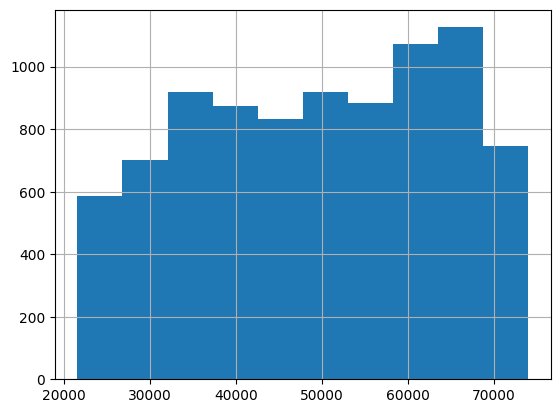

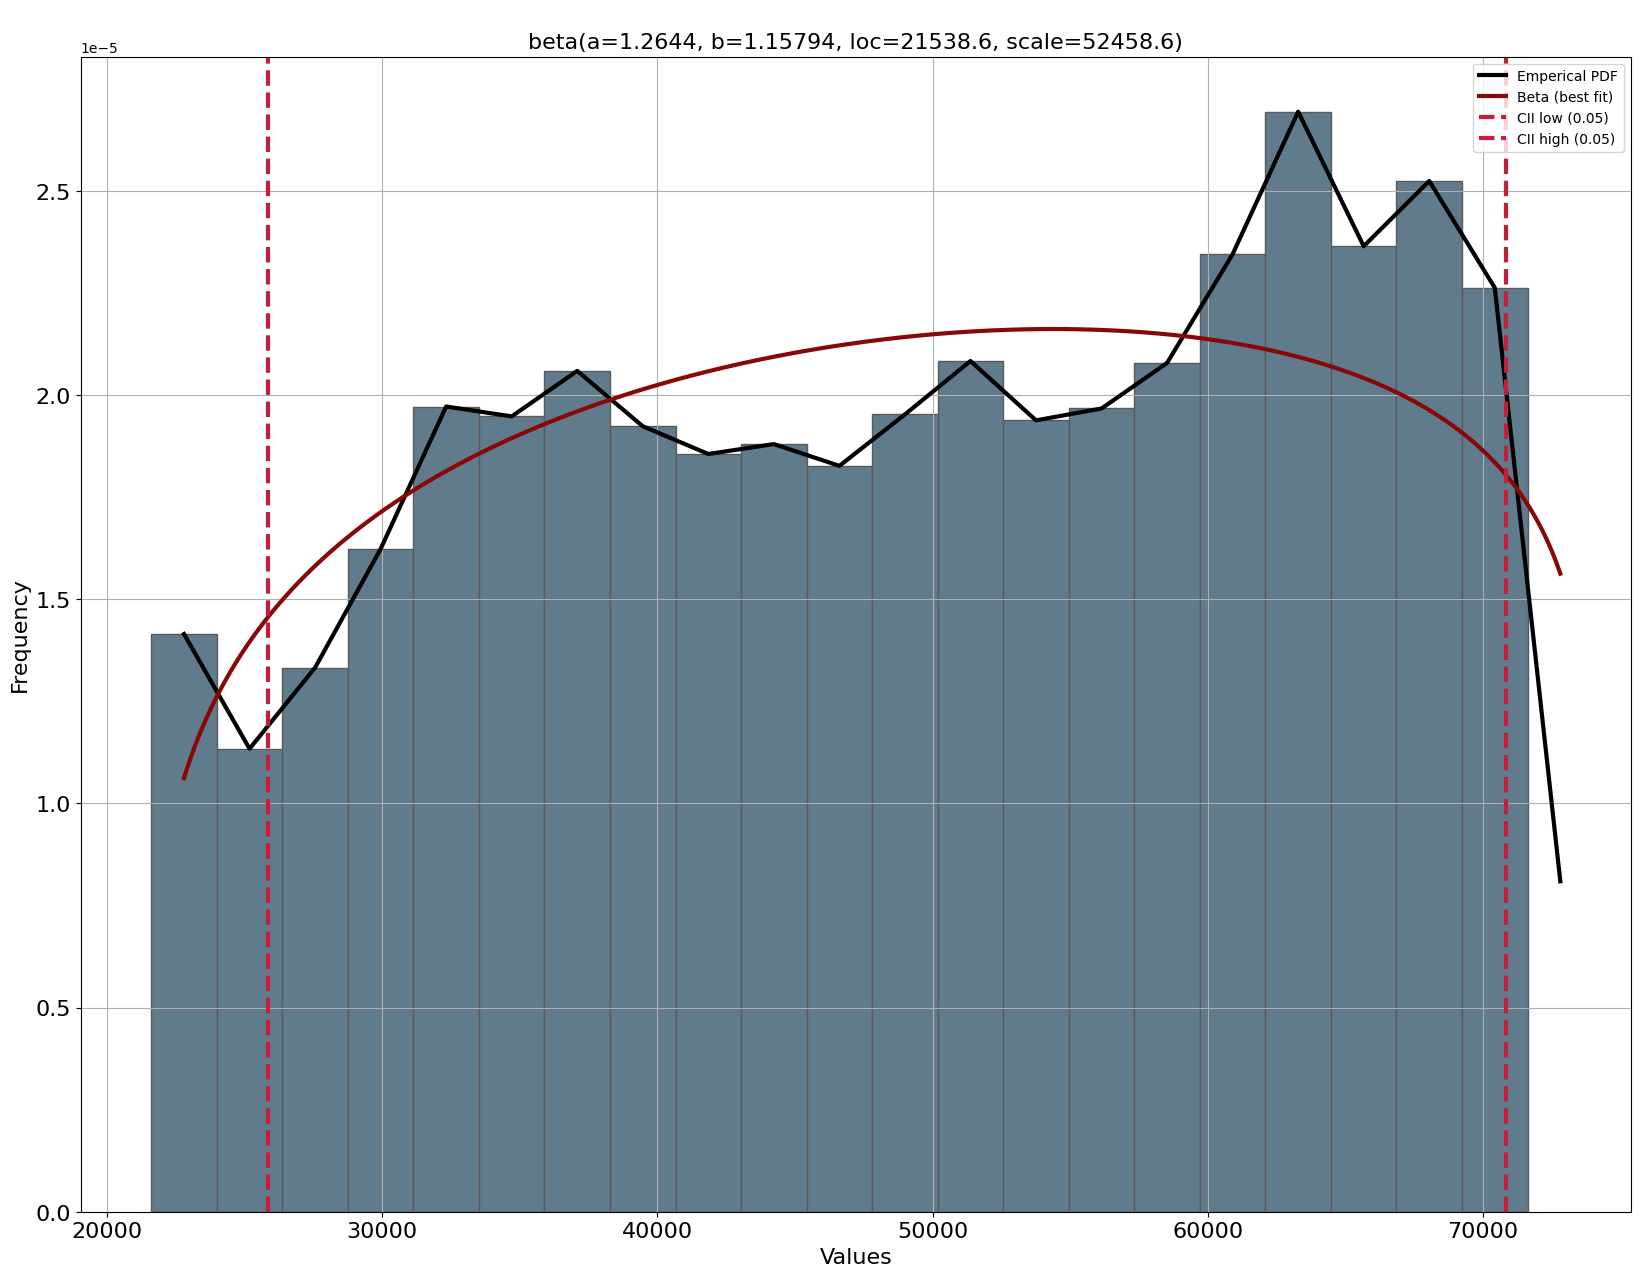

In [14]:
data['num_llegada'].hist()
from distfit import distfit
dist = distfit()
dist.fit_transform(data['num_llegada'])
dist.plot()
dist.summary